In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
%matplotlib inline

train data path

In [7]:
train_dir = 'DataJST/Train'

list for images from class folders

In [10]:
normal = [fn for fn in os.listdir(f'{train_dir}/NORMAL') if fn.endswith('.jpg')]
abnormal = [fn for fn in os.listdir(f'{train_dir}/ABNORMAL') if fn.endswith('.jpg')]

random select for 3 samples

In [11]:
selectNormal = np.random.choice(normal, 3, replace=False)
selectAbnormal = np.random.choice(abnormal, 3, replace=False)

plot figure image matrix 2x3

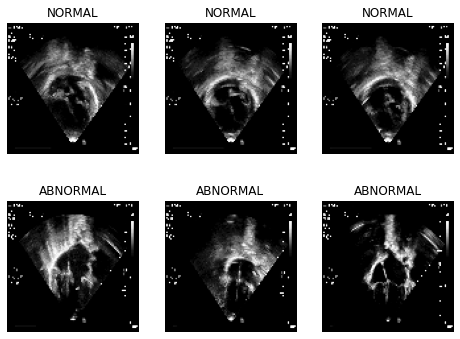

In [16]:
fig = plt.figure(figsize=(8,6))
for i in range(6):
    if i < 3 :
        fp = f'{train_dir}/NORMAL/{selectNormal[i]}'
        label = 'NORMAL'
    else:
        fp = f'{train_dir}/ABNORMAL/{selectAbnormal[i-3]}'
        label = 'ABNORMAL'
    ax = fig.add_subplot(2, 3, i+1)

    fn = image.load_img(fp, target_size=(100,100), color_mode='grayscale')
    plt.imshow(fn, cmap='Greys_r')
    plt.title(label)
    plt.axis('off')
plt.show()

check number of files

In [17]:
len(normal), len(abnormal)

(70, 70)

create matrix (n X m)

In [18]:
def img2np(path, list_of_filename, size = (64,64)):
    #iterating through each file
    for fn in list_of_filename:
        fp = path + fn
        current_image = image.load_img(fp, target_size=size, color_mode='grayscale')

        #convert image to matrix
        img_ts = image.img_to_array(current_image)
        #turn in 1D array
        img_ts = [img_ts.ravel()]

        try:
            #concatetnate different images
            full_mat = np.concatenate((full_mat, img_ts))
        except UnboundLocalError:
            full_mat = img_ts
    return full_mat

run in our folders

In [19]:
normalImages = img2np(f'{train_dir}/NORMAL/', normal)
abnormalImages = img2np(f'{train_dir}/ABNORMAL/', abnormal)

Average images

In [20]:
def find_mean_image(full_mat, title, size=(64,64)):
    #calculate mean
    mean_img = np.mean(full_mat, axis = 0)
    #reshape it back to matrix
    mean_img = mean_img.reshape(size)
    plt.imshow(mean_img, vmin=0, vmax=255, cmap='Greys_r')
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img

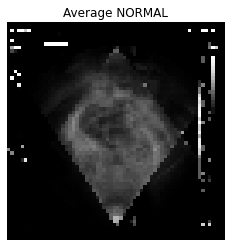

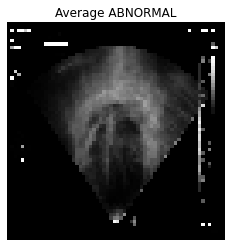

In [21]:
normalMean = find_mean_image(normalImages, 'NORMAL')
abnormalMean = find_mean_image(abnormalImages, 'ABNORMAL')

contrast between average image

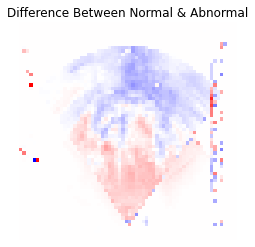

In [22]:
contrastMean = normalMean - abnormalMean
plt.imshow(contrastMean, cmap='bwr')
plt.title(f'Difference Between Normal & Abnormal')
plt.axis('off')
plt.show()

Eigenimages

In [24]:
from sklearn.decomposition import PCA
from math import ceil 

In [25]:
def eigenimages(full_mat, title, n_comp = 0.7, size=(64,64)):
    pca = PCA(n_components=n_comp, whiten=True)
    pca.fit(full_mat)
    print('Number of PC : ', pca.n_components_)
    return pca

In [26]:
def plot_pca(pca, size=(64,64)):
    n = pca.n_components_
    fig = plt.figure(figsize=(8,8))
    r = int(n**.5)
    c = ceil(n/r)
    for i in range(n):
        ax = fig.add_subplot(r, c, i+1, xticks = [], yticks = [])
        ax.imshow(pca.components_[i].reshape(size), cmap='Greys_r')
    plt.axis('off')
    plt.show()

Number of PC :  4


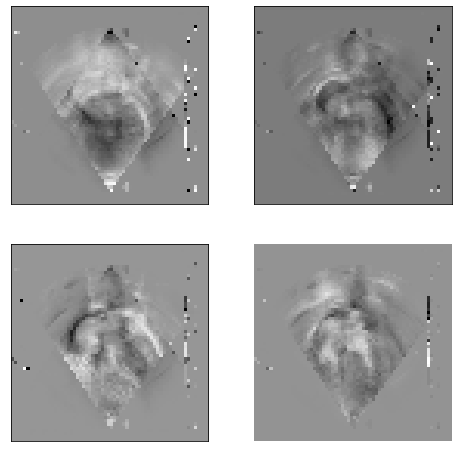

Number of PC :  5


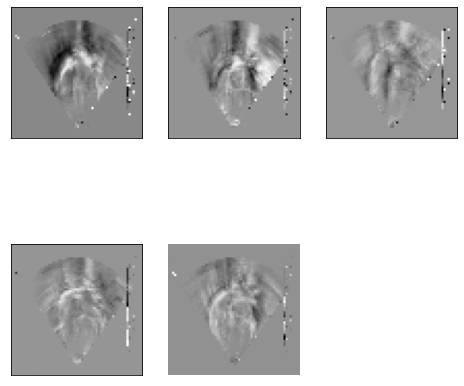

In [27]:
plot_pca(eigenimages(normalImages, 'NORMAL'))
plot_pca(eigenimages(abnormalImages, 'ABNORMAL'))